# Proyek Analisis Data: [E-commerce-public Dataset]
- **Nama:** [Moch Nazham Ismul Azham]
- **Email:** [nazham092000@gmail.com]
- **ID Dicoding:** [MC367D5Y0682]

## Menentukan Pertanyaan Bisnis


1.   Produk apa yang paling banyak dibeli?
2.   Bagaimana distribusi pelanggan berdasarkan lokasi geografis
3.   Metode pembayaran apa yang sering digunakan?
4. Bagaimana pola musiman dalam jumlah pesanan?


## Import Semua Packages/Library yang Digunakan

In [668]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [669]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [670]:
# gathering data customers
customers_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/customers_dataset.csv")
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [671]:
# gathering data geolocation
geolocation_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/geolocation_dataset.csv")
geolocation_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [672]:
# gathering data orders
orders_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [673]:
# gathering data product
products_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [674]:
# gathering data sellers
sellers_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [675]:
# gathering data payment
order_payments_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [676]:
# gathering dataset order item
order_items_df = pd.read_csv("/content/drive/MyDrive/Dataset/E-Commerce/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

###### Assessing data Customers

In [677]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [678]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [679]:
print("Jumlah duplikat data customers: ",customers_df.duplicated().sum())


Jumlah duplikat data customers:  0


In [680]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


###### Assessing data Geolocation

In [681]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [682]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [683]:
print("Jumlah data duplikat data geolocation: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah data duplikat data geolocation:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


###### Assessing data Orders

In [684]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [685]:
print("Jumlah Missing Value")
orders_df.isna().sum()

Jumlah Missing Value


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [686]:
print("Jumlah Data duplikat: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah Data duplikat:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


###### Assessing data Product

In [687]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [688]:
print("Missing Value data Product")
products_df.isna().sum()

Missing Value data Product


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [689]:
print("Jumlah Duplikasi data Product:  ", products_df.duplicated().sum())
products_df.describe()

Jumlah Duplikasi data Product:   0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


###### Assessing data Seller

In [690]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [691]:
print("Missing value data Seller")
sellers_df.isna().sum()

Missing value data Seller


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [692]:
print("Jumlah duplikasi data seller: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi data seller:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


###### Assessing data Payment

In [693]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [694]:
print("Missing value data Payment")
order_payments_df.isna().sum()

Missing value data Payment


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [695]:
print("jumlah duplikasi data payment: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

jumlah duplikasi data payment:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


###### Assessing data Order Items

In [696]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [697]:
print("Missing value order items")
order_items_df.isna().sum()

Missing value order items


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [698]:
print("jumlah duplikasi data order item", order_items_df.duplicated().sum())
order_items_df.describe()

jumlah duplikasi data order item 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### **Insight: Assessing Data**

###### 1. Dataset Customers
- Terdapat Kolom:  customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state
- Terdapat 99.441 data
- tidak terdapat missing value
- tidak ada duplikasi data

###### 2. Dataset Geolocation
- Terdapat Kolom: geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state
- Terdapat 1.000.163 data
- Tidak terdapat missing value
- Terdapat duplikasi data sebanyak 261.831 data

###### 3. Dataset Order
- Terdapat kolom: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- Terdapat 99.441 data
- ada beberapa kolom yang bertipe data salah
	1. order_purchase_timestamp
	2. order_approved_at
	3. order_delivered_carrier_date
	4. order_delivered_customer_date
	5. order_estimated_delivery_date

data tersebut bertipe data object, seharusnya bertipe data datetime karena data tersebut menunjukan waktu

- Terdapat missing value di beberapa kolom:
	1. **order_aprove_at** sebanyak (160 data)
	2. **order_delivered_carrier_date** sebanyak (1783 data)
	3. **order_delivered_customer_date** sebanyak (2965 data)
- tidak ada data duplikasi


###### 4. Dataset Product
- Terdapat kolom: product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- Terdapat 32.951 data
- terdapat missing value di beberapa kolom:
	1. **product_category_name** sebanyak (610 data)
	2. **product_name_lenght** sebanyak (610 data)
	3. **product_description_name** sebanyak (610 data)
	4. **product_photos_qty** sebanyak (610 data)
	5. **product_weight_g** sebanyak (2 data)
	6. **product_lenght_cm** sebanyak (2 data)
	7. **product_height_cm** sebanyak (2 data)
	8. **product_width_cm** sebanyak (2 data)
- Tidak terdapat data duplikasi

###### 5. Dataset seller
- Terdapat Kolom: seller_id, seller_zip_code_prefix, seller_city, seller_state
- Terdapat 3.095 data
- tidak terdapat missing value
- tidak ada duplikasi data

###### 6. Dataset Order_payment
- Terdapat kolom:order_id, payment_sequential, payment_type, payment_installment, payment_value
- terdapat 103.886 data
- Tidak terdapat missing value
- Tidak ada data duplikasi

###### 7. Dataset Order_item
- Terdapat Kolom: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- Terdapat 112.650 data
- Tidak terdapat missing value
- Tidak ada data duplikasi








### Cleaning Data

##### Cleaning Data Geolocation

###### Data Duplicated

In [699]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi data geolocation: ", geolocation_df.duplicated().sum())
geolocation_df.info()

Jumlah duplikasi data geolocation:  0
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


##### Cleaning data Order

###### Memperbaiki tipe data

In [700]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


###### Missing value

In [701]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


1. Tabel **order_aprove_at**

In [702]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [703]:
orders_df[orders_df['order_approved_at'].isnull()]['order_status'].value_counts()

,count
order_status,
canceled,141
delivered,14
created,5


In [704]:
orders_df.loc[orders_df['order_approved_at'].isna() & (orders_df['order_status'] != 'canceled'), 'order_approved_at'] = orders_df['order_purchase_timestamp']

In [705]:
orders_df.dropna(subset=['order_approved_at'], inplace=True)


In [706]:
orders_df.order_approved_at.isna().sum()

0

2. Tabel **order_delivered_carrier_date**

In [707]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [708]:
orders_df[orders_df['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

,count
order_status,
unavailable,609
canceled,409
invoiced,314
processing,301
created,5
approved,2
delivered,2


In [709]:
# Mengganti nilai missing dengan median dari pesanan yang sama
median_carrier_date = orders_df['order_delivered_carrier_date'].median()
orders_df['order_delivered_carrier_date'].fillna(median_carrier_date, inplace=True)

<ipython-input-709-424da45c2bcc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_carrier_date'].fillna(median_carrier_date, inplace=True)


In [710]:
orders_df.order_delivered_carrier_date.isna().sum()

0

3. Tabel **order_delivered_customer_date**

In [711]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-01-24 16:10:58,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-01-24 16:10:58,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-01-24 16:10:58,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,2018-01-24 16:10:58,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,2018-01-24 16:10:58,NaT,2018-02-06
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-24 16:10:58,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-01-24 16:10:58,NaT,2017-09-15


In [712]:
orders_df[orders_df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

,count
order_status,
shipped,1107
unavailable,609
canceled,478
invoiced,314
processing,301
delivered,8
created,5
approved,2


In [713]:
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(
    orders_df['order_delivered_customer_date'].mean())

In [714]:
orders_df.order_delivered_customer_date.isna().sum()

0

In [715]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


##### Cleaning Data Product

In [716]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


###### Missing value

1. kolom **product_category_name**

In [717]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [718]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [719]:
# Mengganti nilai missing dengan nilai yang sering muncul
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

<ipython-input-719-507615b5bcd4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)


In [720]:
products_df.product_category_name.isna().sum()

0

2. Kolom **product_name_lenght**

In [721]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [722]:
products_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [723]:
# Mengganti nilai missing dengan nilai rata rata
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)

<ipython-input-723-41ec6feb70e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)


In [724]:
products_df.product_name_lenght.isna().sum()

0

3. Kolom **product_description_name**

In [725]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,48.476949,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,48.476949,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,48.476949,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,48.476949,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,48.476949,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,48.476949,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,48.476949,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,48.476949,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,48.476949,NaN,NaN,1300.0,45.0,16.0,45.0


In [726]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [727]:
# Mengganti nilai missing dengan nilai rata rata
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)

<ipython-input-727-7c8260adc8c2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)


In [728]:
products_df.product_description_lenght.isna().sum()

0

4. Kolom **product_photos_qty**

In [729]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,48.476949,771.495285,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,48.476949,771.495285,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,48.476949,771.495285,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,48.476949,771.495285,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,48.476949,771.495285,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,48.476949,771.495285,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,48.476949,771.495285,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,48.476949,771.495285,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,48.476949,771.495285,NaN,1300.0,45.0,16.0,45.0


In [730]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [731]:
# Mengganti nilai missing dengan nilai tengah
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

<ipython-input-731-3efb3b7dd33c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)


5. Kolom **product_weight_g**
6. Kolom **product_lenght_cm**
7. Kolom **product_height_cm**
8. Kolom **product_width_cm**

In [732]:
products_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [733]:
products_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [734]:
products_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [735]:
products_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [736]:
# Mengganti nilai missing dengan nilai tengah
numerical_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numerical_columns:
    products_df[col] = products_df[col].fillna(products_df[col].median())

In [737]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### **Insight: Cleaning Data**

###### 1. Dataset Geolocation
- terdapat 261.831 data yang duplikat
- menghapus data duplikat dengan drop_duplicates agar data bersih dari redundan

###### 2. Dataset Order
1. Memperbaiki tipe data
	- semua data yang awalnya bertipe data object di ubah menjadi tipe data datetime karena data di dalam tabel merupakan data waktu
	- data dimasukkan kedalam variable datetime_columns kemudian di ubah data nya menggunakan perulangan dengan pd.to_datetime()
2. mengatasi missing value
	- terdapat 3 kolom yang missing value:
		- order_approved_at: 160 data kosong.
		- order_delivered_carrier_date: 1.783 data kosong.
		- order_delivered_customer_date: 2.965 data kosong.
	- solusinya:
		- order_approved_at: nilai kosong yang memiliki status order 'canceled' dihapus dengan menggunakan kode **orders_df.dropna(subset=['order_approved_at'], inplace=True)** kemudian sisanya diganti dengan nilai order_purchase_timestamp
		- order_delivered_carrier_date: nilai kosong di ganti dengan nilai median dari pesanan yang sama
		- order_delivered_customer_date: nilai kosong diganti dengan nilai rata rata menggunakan kode **"fillna(orders_df['order_delivered_customer_date'].mean()**

###### 3. Dataset Product
- mengatasi missing value
- terdapat beberapa kolom yang missing value:
	1. product_category_name, product_name_lenght, product_description_lenght, product_photos_qty: Masing masing terdapat 610 data kosong.
	2. Kolom dengan dimensi dan berat produk (product_weight_g, product_length_cm, product_height_cm, product_width_cm): masing masing terdapat 2 data kosong.
- solusinya:
	1. product_categoory_name: karena ini data kategorikal jadi nilai kosong diganti dengan nilai yang paling sering muncul menggunakan **fillna(products_df['product_category_name'].mode()[0], inplace=True)**
	2. product_name_lenght: nilai kosong diganti dengan nilai rata rata
	3. product_description_name: nilai kosong diganti dengan nilai rata rata
	4. product_photos_qty: nilai kosong diganti dengan nilai tengah
	5. kolom dengan dimensi dan berat produk(product_weight_g, product_length_cm, product_height_cm, product_width_cm): diganti dengan nilai tengah


## Exploratory Data Analysis (EDA)

### Explore Data Customers

In [738]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [739]:
customers_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [740]:
customer_state = customers_df.groupby(by='customer_state').agg({
        'customer_id': 'nunique'
    })
customer_state.sort_values(by='customer_id', ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [741]:
customer_city = customers_df.groupby(by='customer_city').agg({
    'customer_id': 'nunique'
})
customer_city.sort_values(by='customer_id', ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [742]:
# Menghitung jumlah pelanggan berdasarkan kota
customer_counts = customers_df.groupby("customer_city")["customer_id"].count().reset_index()
customer_counts.rename(columns={"customer_id": "total_customers"}, inplace=True)

In [743]:
# Mengurutkan kota dengan pelanggan terbanyak
customer_counts = customer_counts.sort_values(by="total_customers", ascending=False)

In [744]:
customer_counts.head(10)

,customer_city,total_customers
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


### Explore Data Geolocation

In [745]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [746]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [747]:
geo_counts = geolocation_df['geolocation_state'].value_counts()

In [748]:
geo_counts.head(10)

,count
geolocation_state,
SP,285976
MG,101353
RJ,78836
RS,48093
PR,45059
SC,30191
BA,27720
GO,15601
PE,13162


In [749]:
geo_mean = geolocation_df.groupby("geolocation_city")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()
customer_geo = customer_counts.merge(geo_mean, left_on="customer_city", right_on="geolocation_city", how="left")

In [750]:
geolocation_df.groupby(by='geolocation_state').agg({
        'geolocation_zip_code_prefix': 'nunique'
    })

,geolocation_zip_code_prefix
geolocation_state,
AC,46
AL,178
AM,144
AP,26
BA,992
CE,548
DF,516
ES,315
GO,773


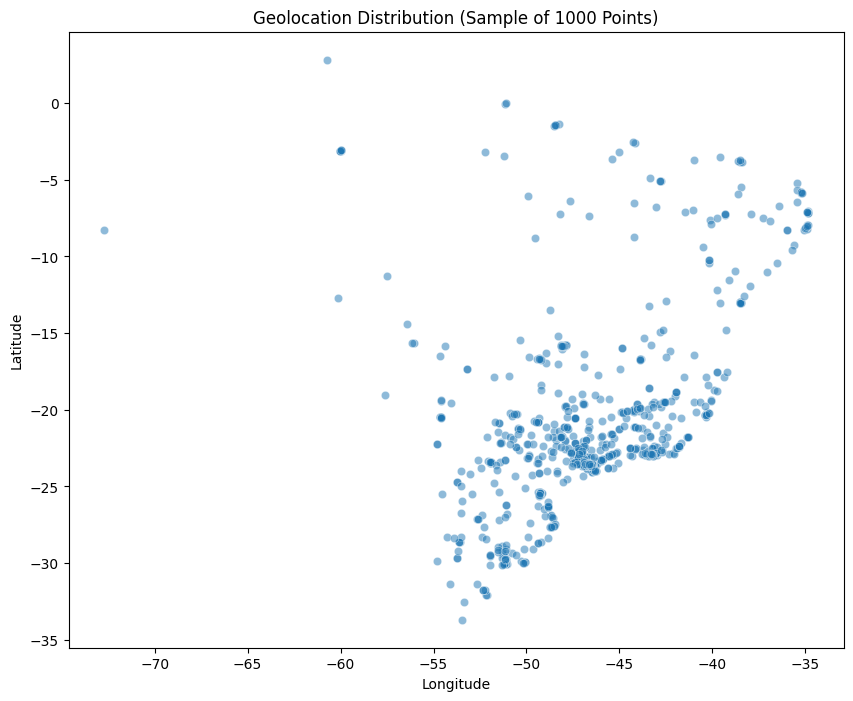

In [751]:
plt.figure(figsize=(10, 8))
sns.scatterplot(geolocation_df.sample(1000), x='geolocation_lng', y='geolocation_lat', alpha=0.5)
plt.title("Geolocation Distribution (Sample of 1000 Points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Explore Data Order

In [752]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [753]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99300,99300,99300,99300,99300,99300,99300,99300
unique,99300,99300,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 07:03:46.015115776,2017-12-31 17:28:47.577703936,2018-01-05 05:40:25.740624128,2018-01-14 12:09:19.035542528,2018-01-24 01:32:49.450151168
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 15:23:38.750000128,2017-09-12 22:08:48,2017-09-19 19:13:01.249999872,2017-09-30 16:31:32.500000,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 22:30:10,2018-01-19 10:55:43,2018-01-24 16:10:58,2018-01-29 11:42:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 13:36:23,2018-05-04 19:56:32.750000128,2018-05-07 14:08:00,2018-05-14 15:23:43.500000,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [754]:
orders_df.groupby(by="order_status").agg({
    "customer_id": "nunique"
})

,customer_id
order_status,
approved,2
canceled,484
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


In [755]:
orderMonth = orders_df["year_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

In [756]:
# Hitung jumlah pesanan per bulan
monthly_orders = orders_df.groupby("year_month")["order_id"].count().reset_index()
monthly_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

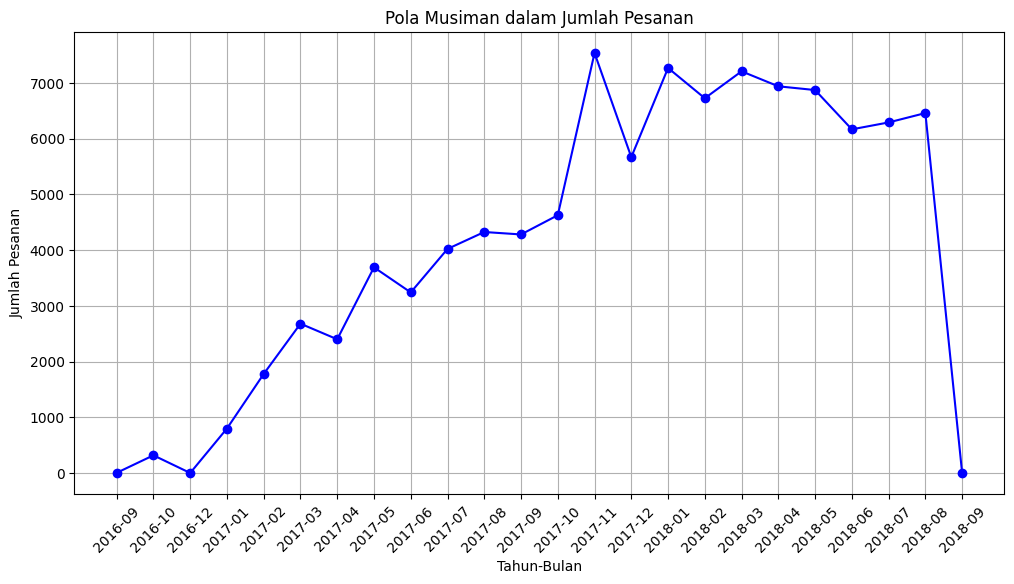

In [757]:
# Visualisasi pola musiman
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders["year_month"].astype(str), monthly_orders["total_orders"], marker="o", linestyle="-", color="b")
plt.xticks(rotation=45)
plt.xlabel("Tahun-Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Pola Musiman dalam Jumlah Pesanan")
plt.grid()
plt.show()

### Explore data Product

In [758]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [759]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.150458,629.208849,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [760]:
products_df.nunique()

,0
product_id,32951
product_category_name,73
product_name_lenght,67
product_description_lenght,2961
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


In [761]:
products_df.groupby(by='product_category_name').agg({
    'product_id': 'nunique'
})

,product_id
product_category_name,
agro_industria_e_comercio,74
alimentos,82
alimentos_bebidas,104
artes,55
artes_e_artesanato,19
...,...
sinalizacao_e_seguranca,93
tablets_impressao_imagem,9
telefonia,1134


In [762]:
# Hitung jumlah pembelian tiap produk
top_products = order_items_df["product_id"].value_counts().head(10).reset_index()
top_products.columns = ["product_id", "total_sold"]

In [763]:
# Gabungkan dengan nama produk
top_products = top_products.merge(products_df, on="product_id", how="left")

In [764]:
top_products.sort_values(by='total_sold', ascending=False)

,product_id,total_sold,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0
1,99a4788cb24856965c36a24e339b6058,488,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
2,422879e10f46682990de24d770e7f83d,484,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0
3,389d119b48cf3043d311335e499d9c6b,392,ferramentas_jardim,59.0,341.0,2.0,1750.0,37.0,22.0,40.0
4,368c6c730842d78016ad823897a372db,388,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
5,53759a2ecddad2bb87a079a1f1519f73,373,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
6,d1c427060a0f73f6b889a5c7c61f2ac4,343,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
7,53b36df67ebb7c41585e8d54d6772e08,323,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0
8,154e7e31ebfa092203795c972e5804a6,281,beleza_saude,48.0,575.0,1.0,100.0,20.0,15.0,15.0
9,3dd2a17168ec895c781a9191c1e95ad7,274,informatica_acessorios,48.0,894.0,1.0,533.0,22.0,11.0,20.0


In [765]:
# Hitung jumlah produk dalam setiap kategori
category_counts = products_df["product_category_name"].value_counts().head(10)  # Top 10 kategori

<ipython-input-766-1375539b4fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


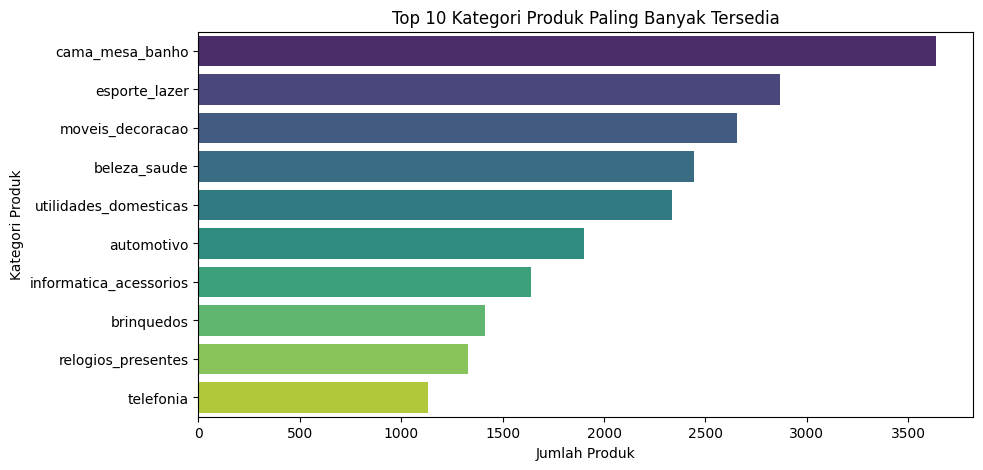

In [766]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk Paling Banyak Tersedia")
plt.show()

### Explore data seller

In [767]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [768]:
seller_city = sellers_df.groupby(by='seller_city').agg({
    'seller_id': 'nunique'
})

In [769]:
seller_city.rename(columns={"seller_id":"total_seller"}, inplace=True)

In [770]:
seller_city.sort_values(by="total_seller", ascending=False)

,total_seller
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [771]:
# Hitung jumlah penjual per kota
city_counts = sellers_df["seller_city"].value_counts().head(10)

<ipython-input-772-92234c317545>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette="magma")


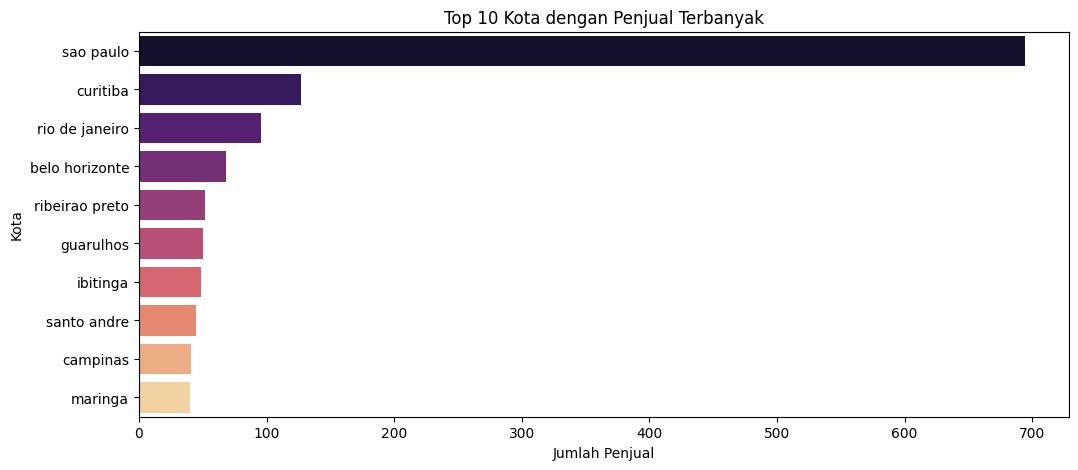

In [772]:
# Visualisasi dengan bar chart
plt.figure(figsize=(12,5))
sns.barplot(y=city_counts.index, x=city_counts.values, palette="magma")
plt.xlabel("Jumlah Penjual")
plt.ylabel("Kota")
plt.title("Top 10 Kota dengan Penjual Terbanyak")
plt.show()

In [773]:
seller_state = sellers_df.groupby(by='seller_state').agg({
    'seller_id': 'nunique'
})

In [774]:
seller_state.rename(columns={"seller_state":"total_seller"}, inplace=True)

In [775]:
state_counts = sellers_df["seller_state"].value_counts().head(10)

<ipython-input-776-4b87dc63d0ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=city_counts.values, palette="magma")


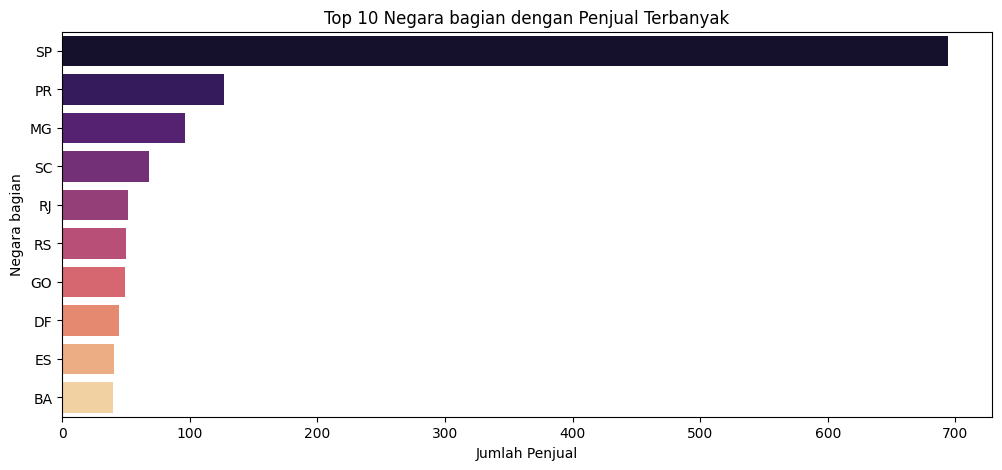

In [776]:
# Visualisasi dengan bar chart
plt.figure(figsize=(12,5))
sns.barplot(y=state_counts.index, x=city_counts.values, palette="magma")
plt.xlabel("Jumlah Penjual")
plt.ylabel("Negara bagian")
plt.title("Top 10 Negara bagian dengan Penjual Terbanyak")
plt.show()

### Explore Data Payment

In [777]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [778]:
# Menghitung jumlah transaksi berdasarkan metode pembayaran
payment_methods = order_payments_df.groupby("payment_type")["order_id"].count().reset_index()
payment_methods.rename(columns={"order_id": "total_transactions"}, inplace=True)

In [779]:
# Urutkan metode pembayaran yang paling sering digunakan
payment_methods = payment_methods.sort_values(by="total_transactions", ascending=False)

In [780]:
# Tampilkan hasilnya
payment_methods

,payment_type,total_transactions
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


### Explore Data Order Item

In [781]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [782]:
order_items_df.groupby(by='order_id').agg({
    'order_item_id': 'nunique'
})

,order_item_id
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1
fffce4705a9662cd70adb13d4a31832d,1


### Insight Explroratory Data Analysis

###### 1. Dataset Customers
- Data unik terbanyak pada kolom customers_state adalah SP dengan data unik sebesar 41.746 itu menandakan bahwa di negara bagian SP banyak pelanggan baru
- Data unik pada kolom customer_id memberikan total pelanggan yang tercatat di dataset.
- Kota dengan total penjualan terbanyak adalah **Sao Paulo**

###### 2. Dataset Geolocation
- Distribusi Geografis:
	- Grouping berdasarkan geolocation_state menunjukkan jumlah kode pos unik di setiap negara bagian.
	- Diambil sample sebanyak 1000 data untuk melihat persebaran distrubusi Data ini membantu memahami penyebaran lokasi geografis pelanggan dan penjual.
- Wilayah Strategis:
	- Negara bagian dengan kode pos unik terbanyak dapat menjadi wilayah strategis untuk pendistribusian dan logistik.

###### 3. Dataset Order
- Melihat dari data order_status bahwa yang paling banyak adalah orderan dengan status Delivered
- dan dari hasil grouping data penjualan berdasarkan tahun dan bulan: Terdapat bawha Data penjualan tertinggi terdapat pada Bulan Oktober tahun 2017

###### 4. Dataset Product
- Melihat jumlah kategori produk yang mempunyai stok terbanyak adalah cama_mesa_banho
- jumlah produk terjual terbanyak adalah moveis_decoracao	dengan jumlah produk 527 terjual

###### 5. Dataset Seller
- dari hasil grouping total penjual berdasarkan kota, terdapat kota sao_paulo yang memiliki jumlah penjual terbesar dengan total 694 penjual

###### 6. Dataset order_payment
- dari hasil perhitungan jumlah transaksi berdasarkan metode pembayaran: metode pembayaran yang paling banyak dipakai adalah credit_card dengan total transaksi 76.795

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dibeli?

<ipython-input-783-d0b4c5102795>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products["product_category_name"], x=top_products["total_sold"], palette="viridis")


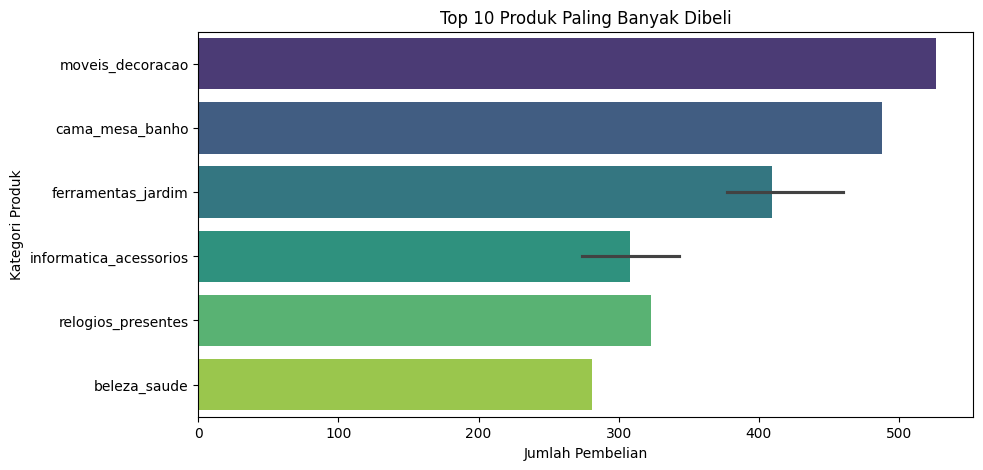

In [783]:
def visual_product():
  # Hitung jumlah pembelian tiap produk
  top_products = order_items_df["product_id"].value_counts().head(10).reset_index()
  top_products.columns = ["product_id", "total_sold"]

  # Gabungkan dengan nama produk
  top_products = top_products.merge(products_df, on="product_id", how="left")

  # Visualisasi
  plt.figure(figsize=(10, 5))
  sns.barplot(y=top_products["product_category_name"], x=top_products["total_sold"], palette="viridis")
  plt.xlabel("Jumlah Pembelian")
  plt.ylabel("Kategori Produk")
  plt.title("Top 10 Produk Paling Banyak Dibeli")
  plt.show()
visual_product()

### Pertanyaan 2: Bagaimana distribusi pelanggan berdasarkan lokasi geografis?

<ipython-input-784-6c06e7c602d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_counts.index, y=geo_counts.values, palette="coolwarm")


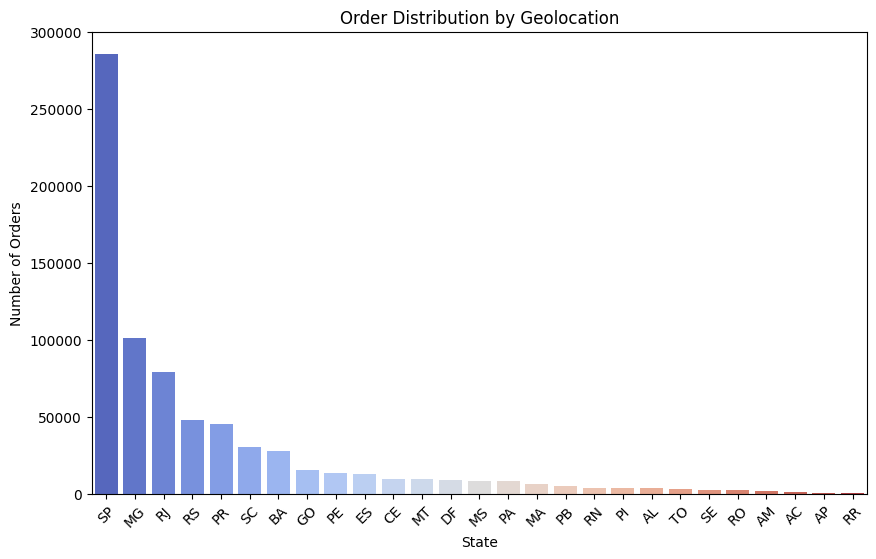

In [784]:
def visual_geolocation():
    geo_counts = geolocation_df['geolocation_state'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=geo_counts.index, y=geo_counts.values, palette="coolwarm")
    plt.title("Order Distribution by Geolocation")
    plt.xlabel("State")
    plt.ylabel("Number of Orders")
    plt.xticks(rotation=45)
    plt.show()
visual_geolocation()

### Pertanyaan 3: Metode pembayaran apa yang sering digunakan?

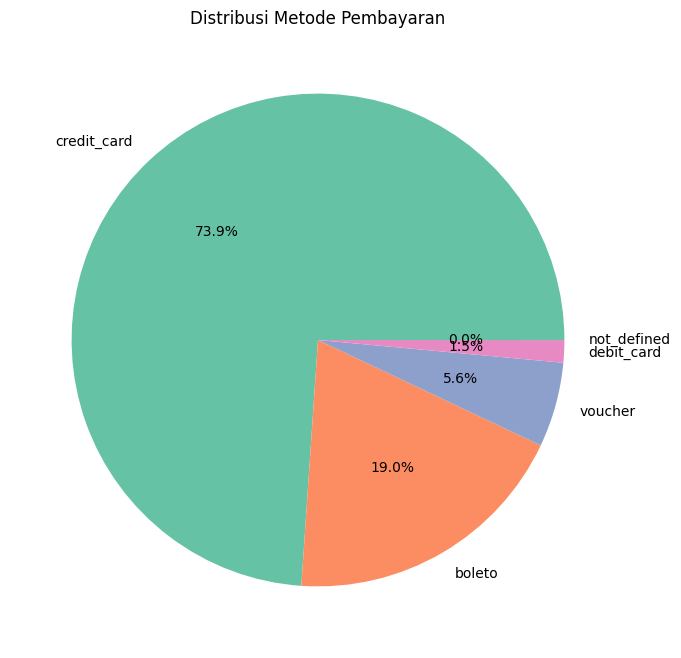

In [785]:
def visual_payment_type():
  # Hitung jumlah transaksi per metode pembayaran
  payment_counts = order_payments_df["payment_type"].value_counts()

  # Visualisasi dengan pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
  plt.title("Distribusi Metode Pembayaran")
  plt.show()
visual_payment_type()

### Pertanyaan 4: Bagaimana pola musiman dalam jumlah pesanan?

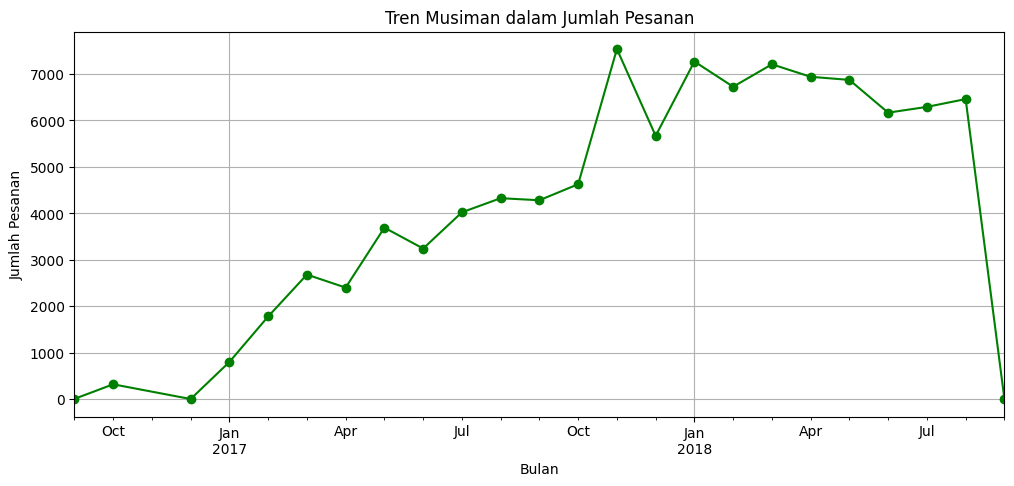

In [786]:
def visual_monthly_orders():
  # Ambil bulan dan tahun dari timestamp
  orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

  # Hitung jumlah order per bulan
  monthly_orders = orders_df["order_month"].value_counts().sort_index()

  # Visualisasi tren pesanan per bulan
  plt.figure(figsize=(12, 5))
  monthly_orders.plot(kind='line', marker='o', color='green')
  plt.xlabel("Bulan")
  plt.ylabel("Jumlah Pesanan")
  plt.title("Tren Musiman dalam Jumlah Pesanan")
  plt.grid()
  plt.show()
visual_monthly_orders()

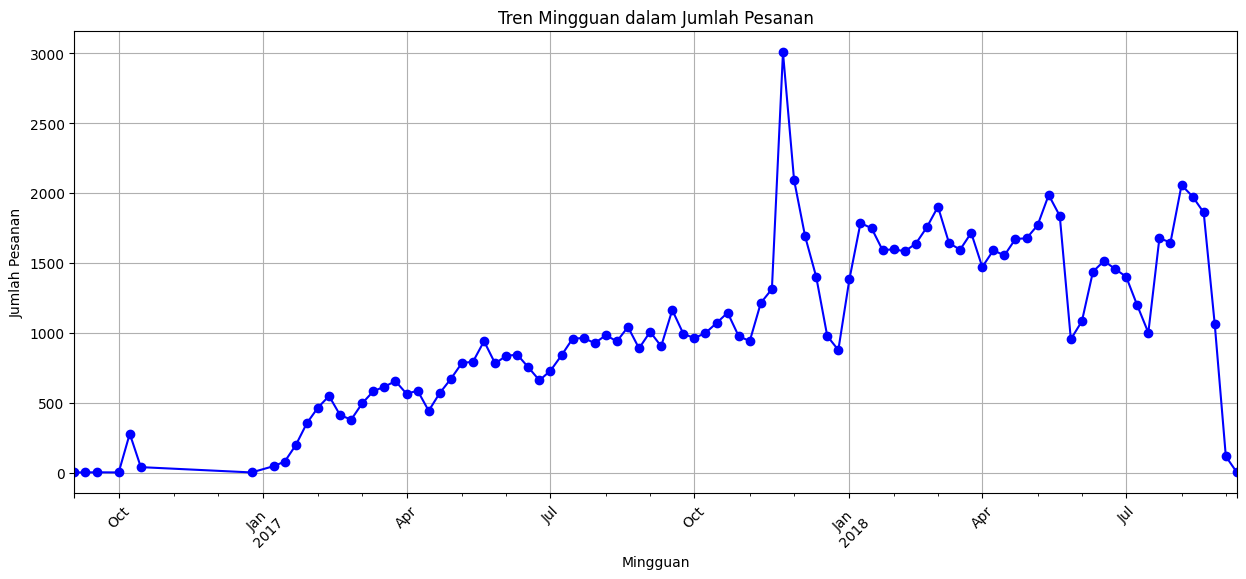

In [787]:
def visual_Weekly_orders():

  # Ambil data perminggu dari timestamp
  orders_df["order_week"] = orders_df["order_purchase_timestamp"].dt.to_period("W")

  # Hitung jumlah order per Minggu
  weekly_orders = orders_df["order_week"].value_counts().sort_index()

  # Visualisasi tren pesanan per Minggu
  plt.figure(figsize=(15, 6))
  weekly_orders.plot(kind='line', marker='o', color='blue')
  plt.xlabel("Mingguan")
  plt.ylabel("Jumlah Pesanan")
  plt.xticks(rotation=45)
  plt.title("Tren Mingguan dalam Jumlah Pesanan")
  plt.grid()
  plt.show()
visual_Weekly_orders()

### **Insight:** Visualization dan Explanatory Analysis

#### Pertanyaan 1: Produk Yang paling banyak diibeli
- Produk yang paling banyak terjual adalah:
  1. Movies decoracao (527 terjual)
  2. Cama, Mesa, Banho (488 terjual)
  3. ferramentas_jardim (484 Terjual)

#### Pertanyaan 2: Distribusi Pesanan berdasarkan lokasi geografi
- Distribusi pesanan berdasarkan lokasi menunjukkan bahwa:
  - São Paulo (SP) memiliki pesanan tertinggi sebanyak 285.976 pesanan.
  - Minas Gerais (MG) memiliki pesanan sebanyak 101.353
  - Rio de Janeiro (RJ) masing-masing memiliki lebih dari 70.000 pesanan.

#### Pertanyaan 3: Metode pembayaran yang sering digunakan
- metode pembayaran yang paling sering digunakan ialah kartu kredit dengan persentase 73,9%
- metode pembayaran kedua yang paling sering ialah boleto dengan persentase 19%

#### Pertanyaan 4: Pola musiman dalam pesanan
  - Tren Mingguan: Volume pesanan terlihat meningkat secara signifikan pada pertengahan hingga akhir tahun 2017.
  - Tren Bulanan: November 2017 mencatat jumlah pesanan tertinggi dengan 7.544 pesanan


## Conclusion

1. Produk apa yang Paling Banyak Dibeli?

  - Produk dengan penjualan tertinggi adalah dekorasi film, perlengkapan rumah tangga (Cama, Mesa, Banho), dan peralatan taman.
  - Permintaan yang tinggi pada kategori ini menunjukkan bahwa ada peluang untuk meningkatkan stok dan variasi produk.

- Rekomendasi:

  - Fokus pada pemasaran dan promosi untuk kategori produk populer.
  - Menyediakan diskon atau paket bundling untuk meningkatkan jumlah pembelian.
  - Menganalisis lebih lanjut faktor yang memengaruhi popularitas produk ini.


2. Bagaimana Distribusi pelanggan Berdasarkan Lokasi Geografis

	- São Paulo (SP) memiliki jumlah pesanan tertinggi, jauh lebih banyak dibandingkan kota lain.
	- Minas Gerais (MG) dan Rio de Janeiro (RJ) juga memiliki volume pesanan yang signifikan.
	- Konsentrasi pelanggan yang tinggi di kota-kota ini menunjukkan bahwa logistik dan pemasaran harus dioptimalkan di wilayah tersebut.

- Rekomendasi:

  - Mempercepat layanan pengiriman di kota-kota dengan pesanan tinggi.
  - Menerapkan strategi pemasaran berbasis lokasi untuk menjangkau pelanggan di daerah yang memiliki potensi pertumbuhan.
  - Membangun gudang atau bermitra dengan penyedia logistik di wilayah strategis untuk meningkatkan efisiensi pengiriman.


3. Metode Pembayaran apa yang Sering Digunakan

  - Kartu kredit adalah metode pembayaran utama, digunakan oleh 73,9% pelanggan.
  - Boleto (transfer bank) digunakan oleh 19% pelanggan, menunjukkan bahwa masih ada sebagian pelanggan yang lebih memilih metode non-kartu.

- Rekomendasi:

  - Memberikan promo atau cashback khusus bagi pengguna kartu kredit untuk meningkatkan penggunaan.
  - Mempertimbangkan integrasi metode pembayaran lain seperti e-wallet atau pembayaran digital untuk meningkatkan aksesibilitas bagi pelanggan yang tidak memiliki kartu kredit.
  - Memastikan sistem pembayaran berjalan lancar tanpa kendala teknis agar tidak menghambat proses transaksi.


4. Bagaimana Pola Musiman dalam jumlah Pesanan

	- Tren mingguan menunjukkan bahwa volume pesanan mengalami peningkatan signifikan pada pertengahan hingga akhir tahun 2017.
	- Bulan November 2017 memiliki jumlah pesanan tertinggi dengan 7.544 transaksi, kemungkinan karena promosi besar seperti Black Friday.

- Rekomendasi:

  - Menyiapkan strategi promosi yang kuat menjelang akhir tahun, terutama saat Black Friday dan musim liburan.
  - Menyediakan stok yang cukup untuk produk yang banyak diminati agar tidak mengalami kekurangan saat permintaan tinggi.
  - Menggunakan strategi retargeting untuk menjangkau kembali pelanggan yang aktif berbelanja selama periode puncak ini.

**Conclution**
- São Paulo merupakan pasar utama, sehingga strategi pemasaran dan distribusi harus difokuskan di sana.
- Produk dekorasi, perlengkapan rumah tangga, dan peralatan taman adalah yang paling diminati, sehingga strategi stok dan promosi harus diarahkan ke kategori ini.
- Kartu kredit menjadi metode pembayaran utama, tetapi perlu mengeksplorasi opsi pembayaran lain agar bisa menjangkau lebih banyak pelanggan.
- Pola musiman menunjukkan lonjakan belanja di akhir tahun, sehingga strategi penjualan harus disesuaikan dengan tren ini.